In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# Load the datase

data = pd.read_csv('/content/Employee.csv')

### **Data Understanding**

In [133]:
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [134]:
data.shape

(74498, 24)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [136]:
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [137]:
data.select_dtypes(include=['object']).columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [138]:
data.select_dtypes(include=['float64','int64']).columns

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure'],
      dtype='object')

### **Exploratory Data Analysis**

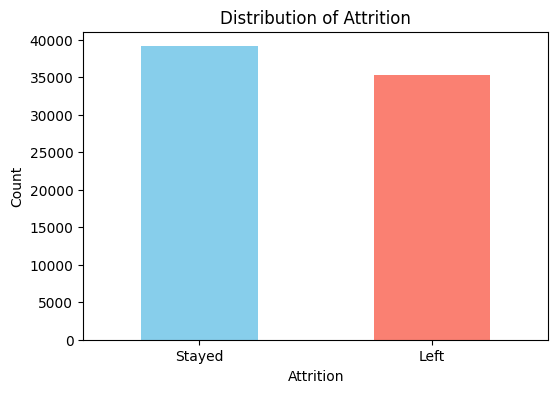

In [139]:
# Distribution of target varibale

plt.figure(figsize=(6, 4))
data['Attrition'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

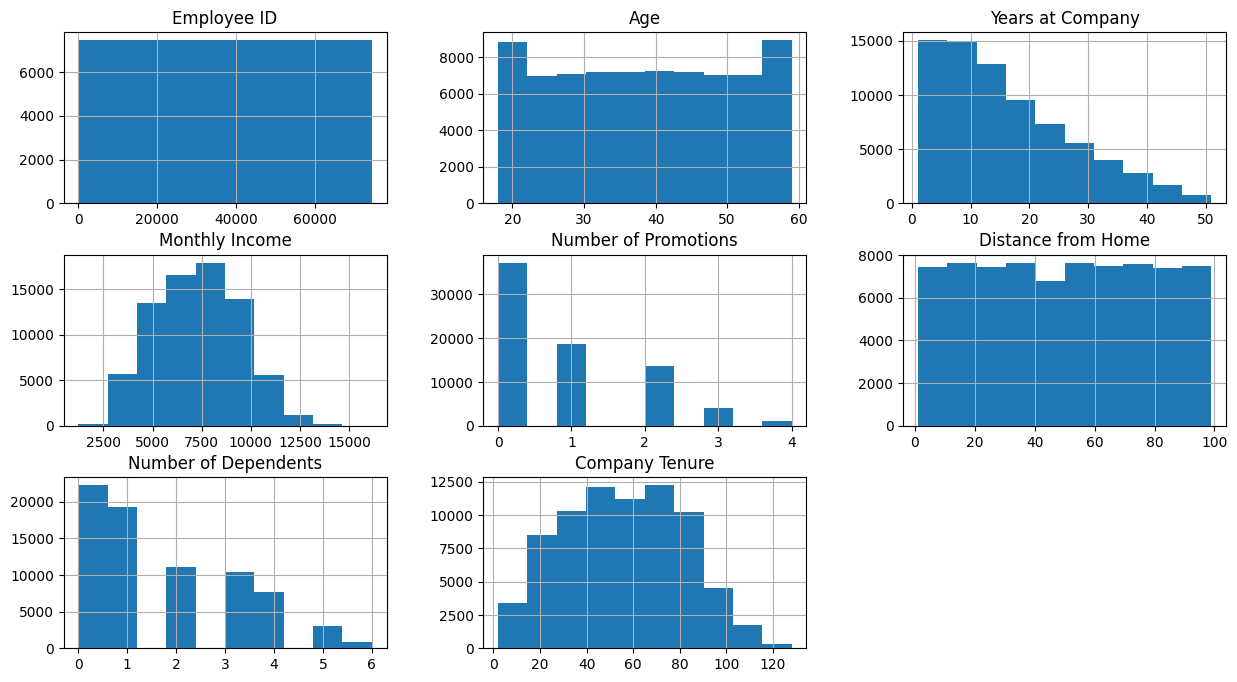

In [140]:
# Distribution of numerical columns

graph = data.select_dtypes(include=['float64','int64'])
graph.hist(figsize=(15,8))
plt.show()

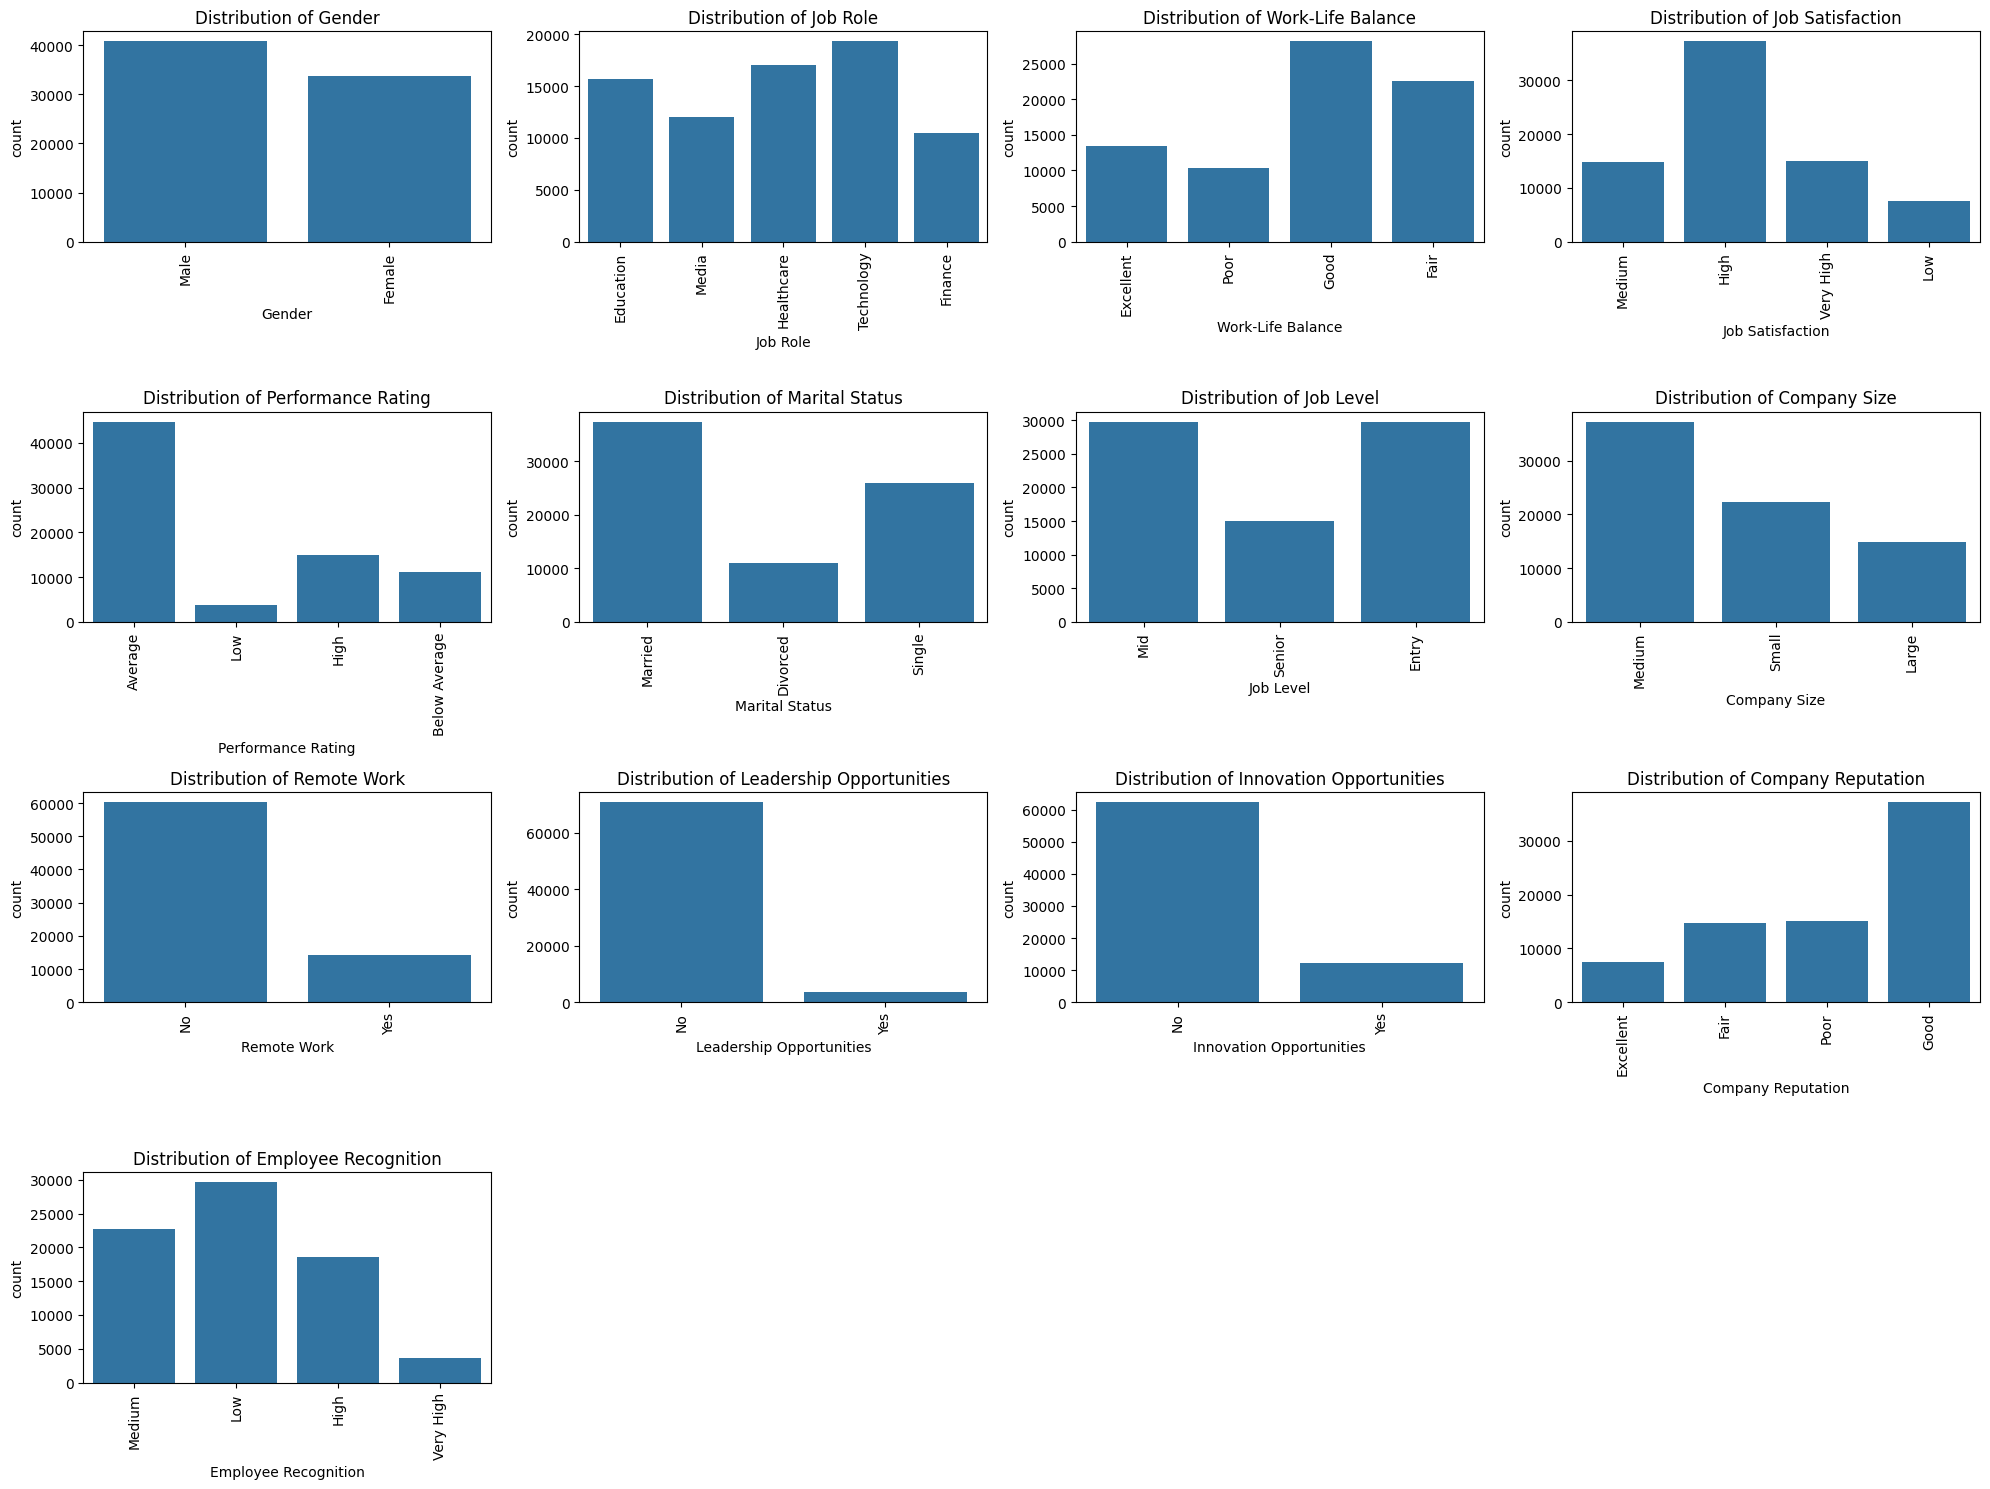

In [141]:
# Categorical feature analysis

categorical_features = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
                        'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
                        'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

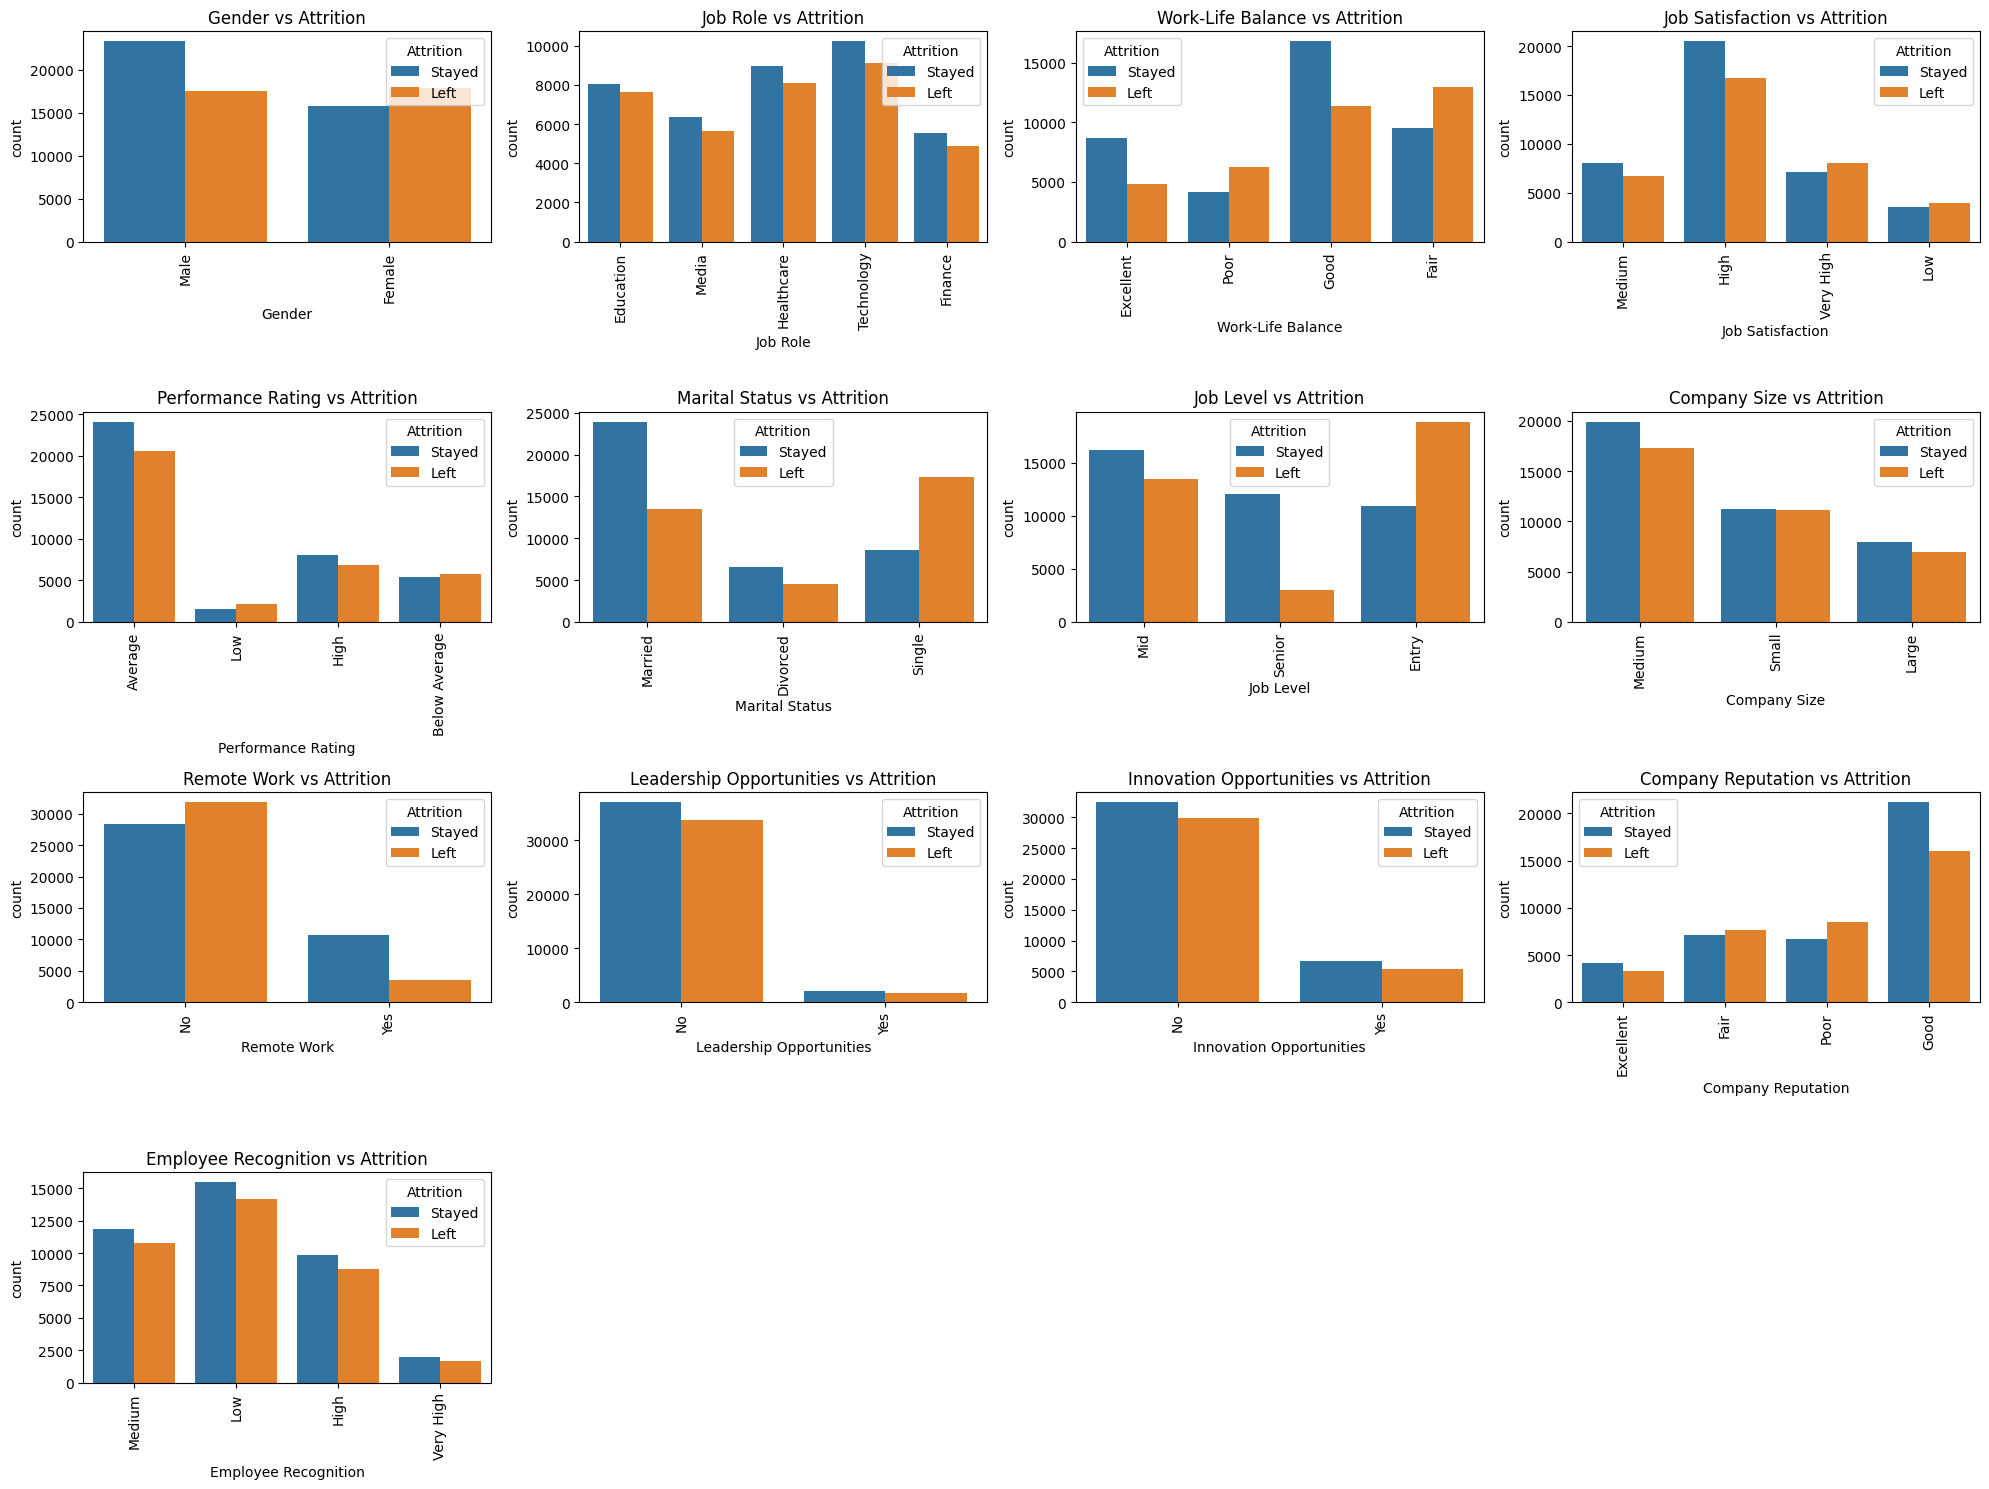

In [142]:
# Relationship between categorical features and Attrition

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=data, x=col, hue='Attrition')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


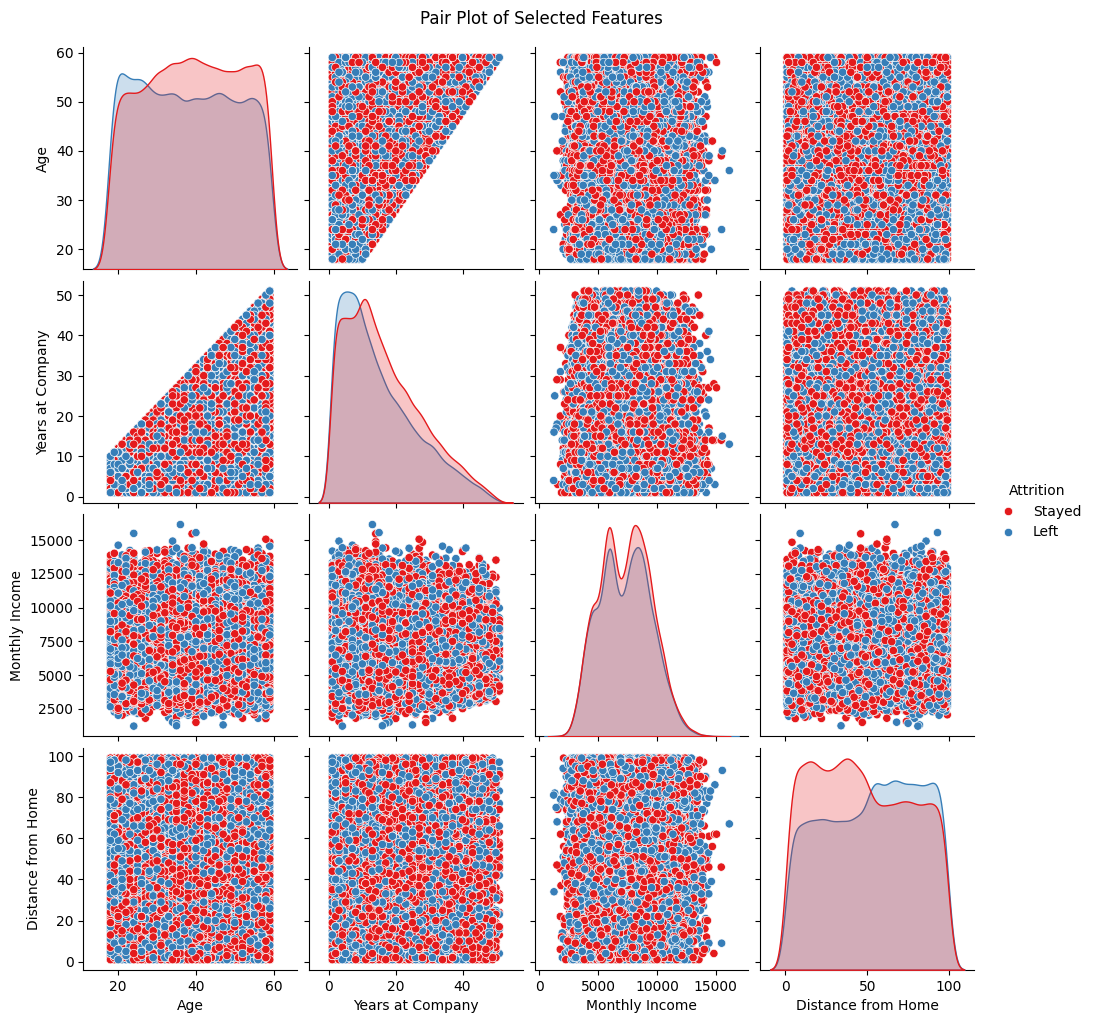

In [143]:
# Relationship between numerical features and Attrition

selected_features = ['Age', 'Years at Company', 'Monthly Income', 'Distance from Home', 'Attrition']

# Pair plot
sns.pairplot(data[selected_features], hue='Attrition', palette='Set1')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


### **Data Preprocessing**

In [144]:
# Checking for duplicates

duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [145]:
# Checking for missing values

data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [146]:
# Handling missing values

# Columns 'Number of Promotions' and 'Number of Dependents' are numerical features and have skewed distribution, so these columns can be filled using median.
# Rest of the columns are categorical , so mode filling.

data['Number of Promotions'] = data['Number of Promotions'].fillna(data['Number of Promotions'].median())
data['Number of Dependents'] = data['Number of Dependents'].fillna(data['Number of Dependents'].median())

In [147]:
cat_col = ['Work-Life Balance', 'Performance Rating', 'Education Level', 'Marital Status',
           'Job Level','Company Size','Company Tenure', 'Remote Work', 'Employee Recognition']

for col in cat_col:
  mode_val = data[col].mode()[0]
  data[col].fillna(mode_val, inplace = True)

In [148]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

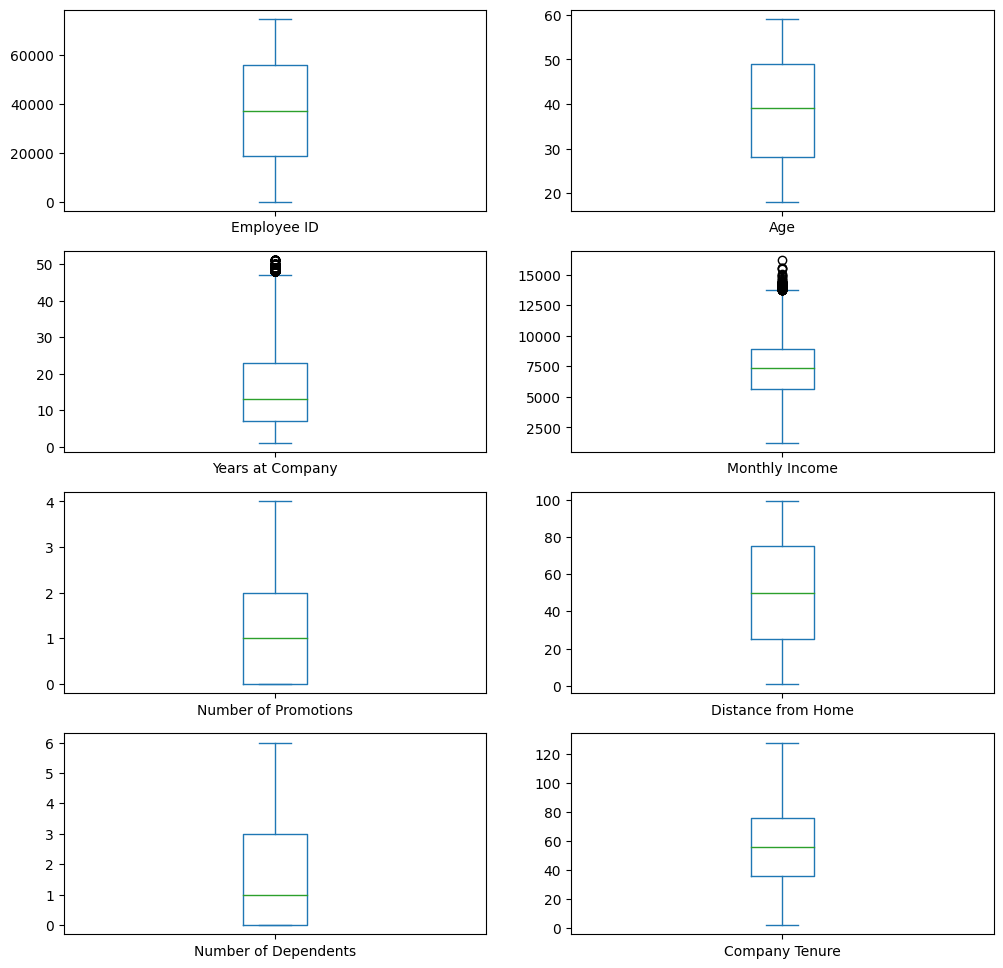

In [149]:
# Outlier detection

data.plot(kind='box', figsize= (12,12), layout= (4,2), sharex= False, subplots= True);

Only two columns have outliers, but these columns  ['Years at company' and 'Monthly income']  are discrete numerical columns , so that not needed to handle it.


In [150]:
# Checking the value_counts of each categorical columns

columns = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
           'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
           'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
           'Innovation Opportunities', 'Company Reputation',
           'Employee Recognition', 'Attrition']

for col in columns:
    print(f"Value counts for column '{col}':\n{data[col].value_counts()}\n")

Value counts for column 'Gender':
Gender
Male      40826
Female    33672
Name: count, dtype: int64

Value counts for column 'Job Role':
Job Role
Technology    19322
Healthcare    17074
Education     15658
Media         11996
Finance       10448
Name: count, dtype: int64

Value counts for column 'Work-Life Balance':
Work-Life Balance
Good         28161
Fair         22528
Excellent    13431
Poor         10378
Name: count, dtype: int64

Value counts for column 'Job Satisfaction':
Job Satisfaction
High         37245
Very High    15079
Medium       14717
Low           7457
Name: count, dtype: int64

Value counts for column 'Performance Rating':
Performance Rating
Average          44720
High             14910
Below Average    11139
Low               3729
Name: count, dtype: int64

Value counts for column 'Overtime':
Overtime
No     50157
Yes    24341
Name: count, dtype: int64

Value counts for column 'Education Level':
Education Level
Bachelor’s Degree    22336
Associate Degree     18648
Mas

In [151]:
# Encoding

# The categorical column have a natural order, the most suitable encoding method for this column would be Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories for each column
ordinal_categories = {
    'Work-Life Balance': ['Poor', 'Fair', 'Good', 'Excellent'],
    'Job Satisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'Performance Rating': ['Low', 'Below Average', 'Average', 'High'],
    'Education Level': ['High School', 'Associate Degree', 'Bachelor’s Degree', 'Master’s Degree', 'PhD'],
    'Job Level': ['Entry', 'Mid', 'Senior'],
    'Company Size': ['Small', 'Medium', 'Large'],
    'Marital Status': ['Single', 'Married', 'Divorced'],
    'Employee Recognition': ['Low', 'Medium', 'High', 'Very High'],
    'Company Reputation': ['Poor', 'Fair', 'Good', 'Excellent']
}

# Create OrdinalEncoder object
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories[column] for column in ordinal_categories.keys()])

# Fit and transform the selected columns
columns_to_encode = list(ordinal_categories.keys())
encoded_data = ordinal_encoder.fit_transform(data[columns_to_encode])

# Replace the original columns with the encoded data
data[columns_to_encode] = encoded_data

In [152]:
from sklearn.preprocessing import LabelEncoder

label_encoded_col = ['Gender', 'Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Job Role']

label_encoder = LabelEncoder()
for col in label_encoded_col:
  data[col] = label_encoder.fit_transform(data[col])

In [153]:
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,3.0,1.0,2.0,2.0,...,0.0,1.0,1.0,89,0,0,0,3.0,1.0,Stayed
1,64756,59,0,4,3,5534,0.0,2.0,0.0,3.0,...,3.0,1.0,1.0,21,0,0,0,1.0,0.0,Stayed
2,30257,24,0,10,2,8159,2.0,2.0,0.0,0.0,...,3.0,1.0,1.0,74,0,0,0,0.0,0.0,Stayed
3,65791,36,0,7,0,3989,2.0,2.0,3.0,1.0,...,2.0,1.0,0.0,50,1,0,0,2.0,1.0,Stayed
4,65026,56,1,41,0,4821,1.0,3.0,2.0,0.0,...,0.0,2.0,1.0,68,0,0,0,1.0,1.0,Stayed


In [154]:
# Dropping irrelevant columns

data.drop(['Employee ID'],axis = 1, inplace = True)

### **Standardisation**

In [162]:
from sklearn.preprocessing import StandardScaler

columns_to_standardise = ['Age', 'Years at Company', 'Monthly Income',
'Number of Promotions', 'Distance from Home', 'Number of Dependents',
'Company Tenure']

scaler = StandardScaler()
data[columns_to_standardise] = scaler.fit_transform(data[columns_to_standardise])

### **Splitting the Data**

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Separate the features and the target variable
X = data.drop(columns = ['Attrition'])
y = data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Random Forest**

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Create a Random Forest classifier with default parameters
rf_default = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_default.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_default = rf_default.predict(X_test)

# Calculate the accuracy score
accuracy_default_rf= accuracy_score(y_test, y_pred_default)
print("Accuracy Score without hyperparameter tuning:", accuracy_default_rf)

Accuracy Score without hyperparameter tuning: 0.7532885906040269


### **Decision Tree**

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier with default parameters
dt_default = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_default.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_default = dt_default.predict(X_test)

# Calculate the accuracy score
accuracy_default_dt = accuracy_score(y_test, y_pred_default)
print("Accuracy Score without hyperparameter tuning:", accuracy_default_dt)

Accuracy Score without hyperparameter tuning: 0.6705369127516778


### **kNN**

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with default parameters
knn_default = KNeighborsClassifier()

# Fit the model on the training data
knn_default.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_default = knn_default.predict(X_test)

# Calculate the accuracy score
accuracy_default_knn = accuracy_score(y_test, y_pred_default)
print("Accuracy Score without hyperparameter tuning:", accuracy_default_knn)

Accuracy Score without hyperparameter tuning: 0.6699328859060403


Based on our analysis, the **Random Forest model** demonstrated the best performance with an **accuracy of 75%**, outperforming both Decision Tree and KNN models. Random Forest's ensemble approach and ability to handle complex datasets contributed to its superior accuracy.